In [1]:
import torch
from PIL import Image
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import matplotlib.pyplot as plt

In [2]:
# Load the model and tokenizer

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [3]:
# Check if GPU is available

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [4]:
# Define parameters for text generation

max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

In [5]:
# Function to predict captions for images

def predict_captions(image_paths):
    captions = []
    
    for image_path in image_paths:
        
        # Load and preprocess the image
        image = Image.open(image_path).convert("RGB")
        inputs = feature_extractor(images = image, return_tensors = "pt")
        inputs = inputs.to(device)

        # Generate captions
        output_ids = model.generate(inputs.pixel_values, **gen_kwargs)
        
        # Decode captions
        caption = tokenizer.decode(output_ids[0], skip_special_tokens=True).strip()
        captions.append(caption)
        
    return captions

In [6]:
# Function to show input images

def show_input_image(image_paths):
    fig = plt.figure(figsize=(10, 5))
    
    for i, image_path in enumerate(image_paths):
        ax = fig.add_subplot(1, len(image_paths), i + 1)
        image = Image.open(image_path)
        ax.imshow(image)
        ax.axis("off")
        ax.set_title("Input Image")
    plt.show()

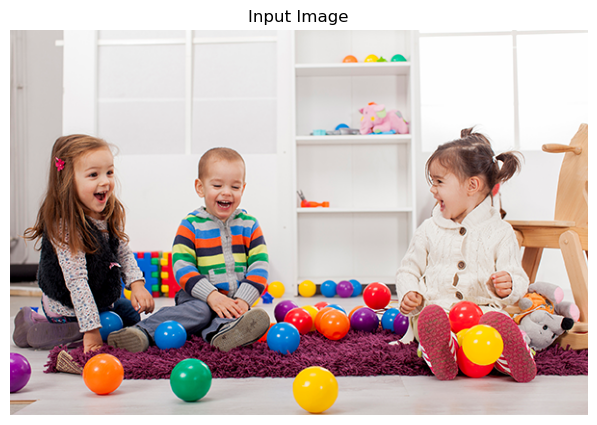

The Captions : ['three children sitting around a table with toys']


In [10]:
# Example usage

input_image = ["/Users/kavu_rojasara/Desktop/VIT-AP/Sem - 2/Kids.jpg"]
show_input_image(input_image)

predicted_captions = predict_captions(input_image)
print("The Captions :", predicted_captions)